In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
train_elephants = '/content/drive/MyDrive/data/train_elephants/'
train_zebras = '/content/drive/MyDrive/data/train_zebras/'
test = '/content/drive/MyDrive/data/test/'

**importing the librairies**

In [3]:
import os, pathlib
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import keras
import warnings
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, GlobalAveragePooling2D, BatchNormalization
warnings.filterwarnings('ignore')

In [4]:
from PIL import Image
import PIL
def load_images_with_labels(path, label):
  images = []
  labels = []
  for filename in os.listdir(path):
    if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.jpeg'):
      image_path = os.path.join(path, filename)
      try:
        image = PIL.Image.open(image_path)
        image = image.resize((64, 64))
        image = np.array(image)
        images.append(image)
        labels.append(label)
      except Exception as e:
        print(f"Error processing {image_path}: {e}")
  return images, labels

train_images_elephants, train_labels_elephants = load_images_with_labels(train_elephants, 0)
train_images_zebras, train_labels_zebras = load_images_with_labels(train_zebras, 1)

In [5]:

### combiner les  données

train_images = np.array(train_images_elephants + train_images_zebras)
train_labels = np.array(train_labels_elephants + train_labels_zebras)

## forme des données(images et labels)
print("the shape of train images is :",  train_images.shape)
print("The shape of labels image is:", train_labels.shape)

## les types de données
print("the type of train images is :",  train_images.dtype)
print("The type of labels image is:", train_labels.dtype)

the shape of train images is : (13999, 64, 64, 3)
The shape of labels image is: (13999,)
the type of train images is : uint8
The type of labels image is: int64


**Preparing the images **

In [6]:
from re import X
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(train_images,
                                                train_labels, test_size = 0.2,
                                                random_state = 42)

### transformer les images en nombre floattante de type 32
Xtrain = Xtrain.astype('float32')
Xtest = Xtest.astype('float32')

### rescaling the data

Xtrain /= 255
Xtest /= 255

# Visualisation images

> Ajouter une citation



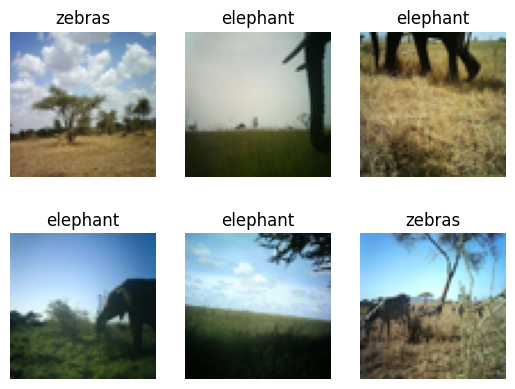

In [7]:
for i in range(6):
  plt.subplot(2, 3, i+1)
  plt.imshow(Xtrain[i])
  plt.axis('off')
  plt.title("elephant" if  ytrain[i] == 0 else "zebras")
plt.show()

**tBuilding the models**

In [8]:
def get_model():
  inputs = keras.Input(shape = (64, 64, 3))

  ### first layers
  x = layers.Conv2D(32, kernel_size = (3, 3), activation = 'relu', padding = 'same')(inputs)
  x = layers.MaxPooling2D(pool_size = (2, 2))(x)

  ## second layers
  x = layers.Conv2D(32, kernel_size = (3, 3), activation='relu')(x)
  x = layers.MaxPooling2D(pool_size = (2, 2))(x)

  ## third layers
  x = layers.Conv2D(64, kernel_size = (3, 3), activation='relu')(x)
  x = layers.MaxPooling2D(pool_size = (2, 2))(x)

  ## flatten
  x = layers.Flatten()(x)
  ### layuers output*
  x = layers.Dense(128, activation='relu')(x)
  outputs = layers.Dense(1, activation='sigmoid')(x)
  model = keras.Model(inputs=inputs, outputs=outputs)
  return model

model = get_model()
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 30, 30, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 323,809 (1.24 MB)

 Trainable params: 323,809 (1.24 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
### compiler le modele
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

history = model.fit(Xtrain, ytrain,
                    epochs = 10,
                    batch_size = 100,
                    validation_data = (Xtest, ytest))

Epoch 1/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 76s 647ms/step - accuracy: 0.6940 - loss: 0.5511 - val_accuracy: 0.8507 - val_loss: 0.3480
Epoch 2/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 85s 684ms/step - accuracy: 0.8599 - loss: 0.3135 - val_accuracy: 0.8993 - val_loss: 0.2589
Epoch 3/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 69s 616ms/step - accuracy: 0.8984 - loss: 0.2422 - val_accuracy: 0.9164 - val_loss: 0.2173
Epoch 4/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 84s 639ms/step - accuracy: 0.9152 - loss: 0.2025 - val_accuracy: 0.9257 - val_loss: 0.1917
Epoch 5/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 80s 621ms/step - accuracy: 0.9361 - loss: 0.1641 - val_accuracy: 0.9375 - val_loss: 0.1794
Epoch 6/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 85s 646ms/step - accuracy: 0.9491 - loss: 0.1399 - val_accuracy: 0.9454 - val_loss: 0.1554
Epoch 7/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 72s 645ms/step - accuracy: 0.9586 - loss: 0.1179 - val_accuracy: 0.9479 - val_loss: 0.1430
Epoch 8/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 80s 629ms/step - accuracy: 0.9601 - loss: 0

Epoch 1


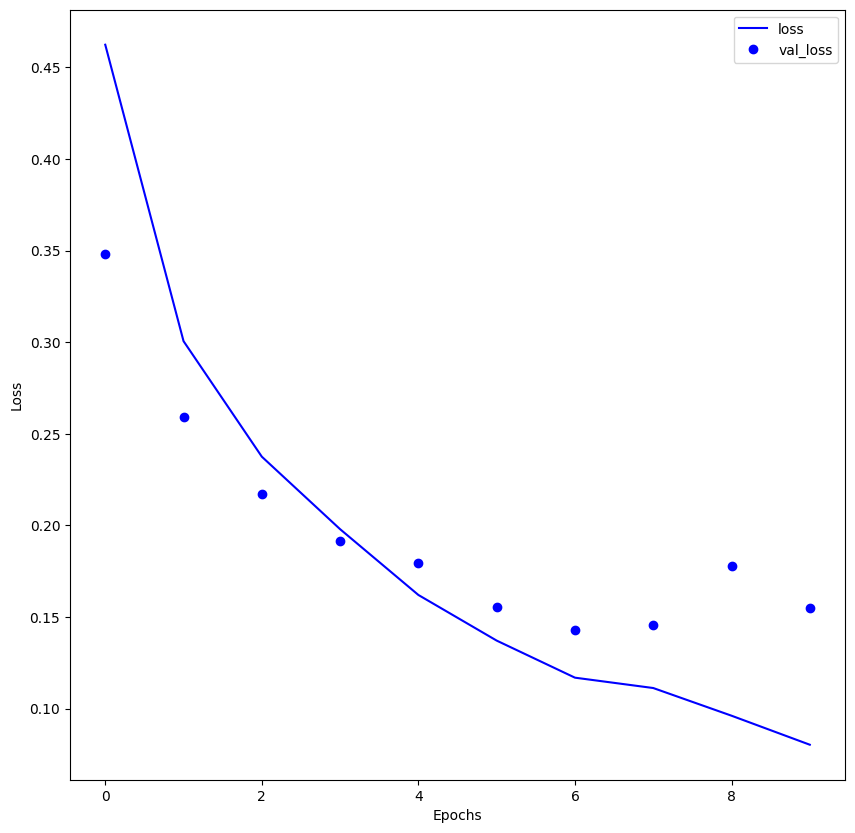

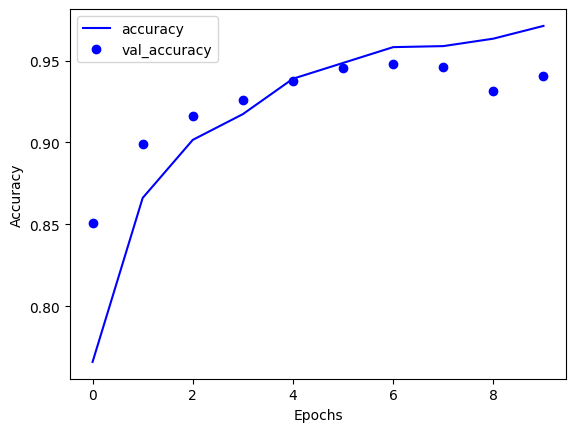

Epoch 2


<Figure size 640x480 with 0 Axes>

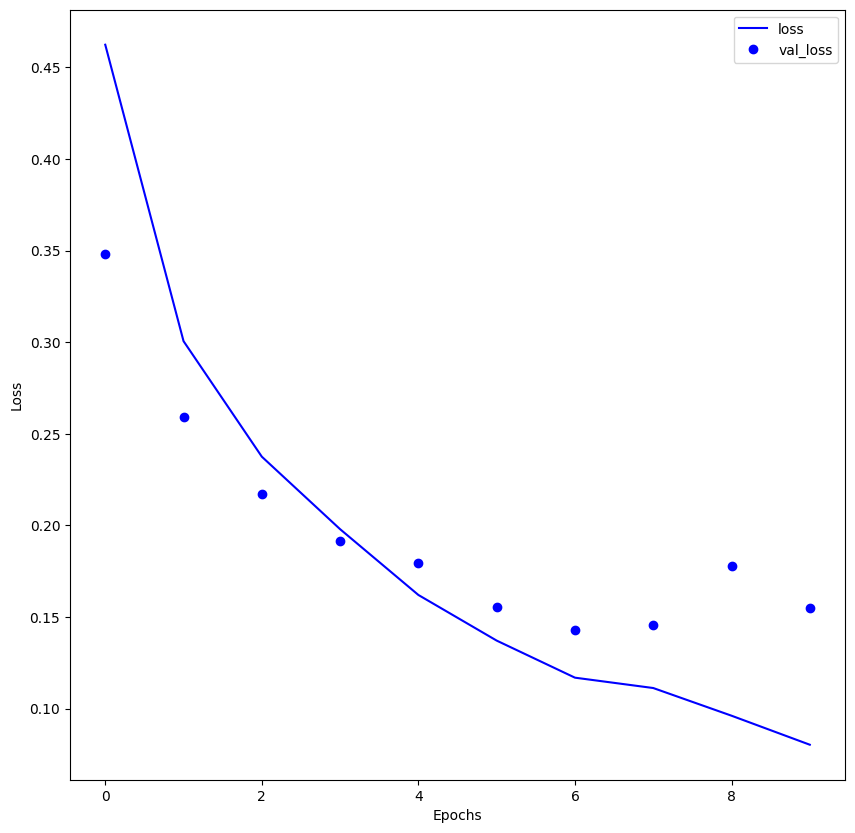

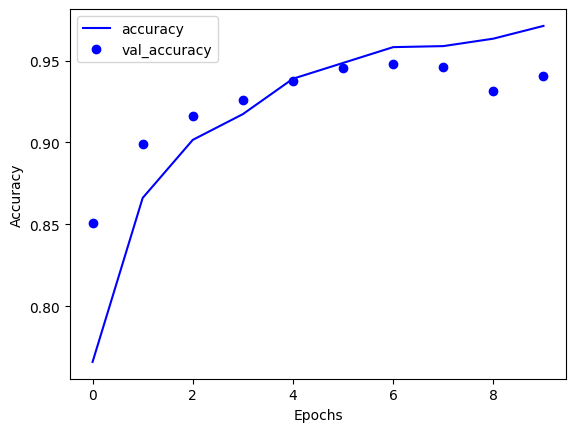

Epoch 3


<Figure size 640x480 with 0 Axes>

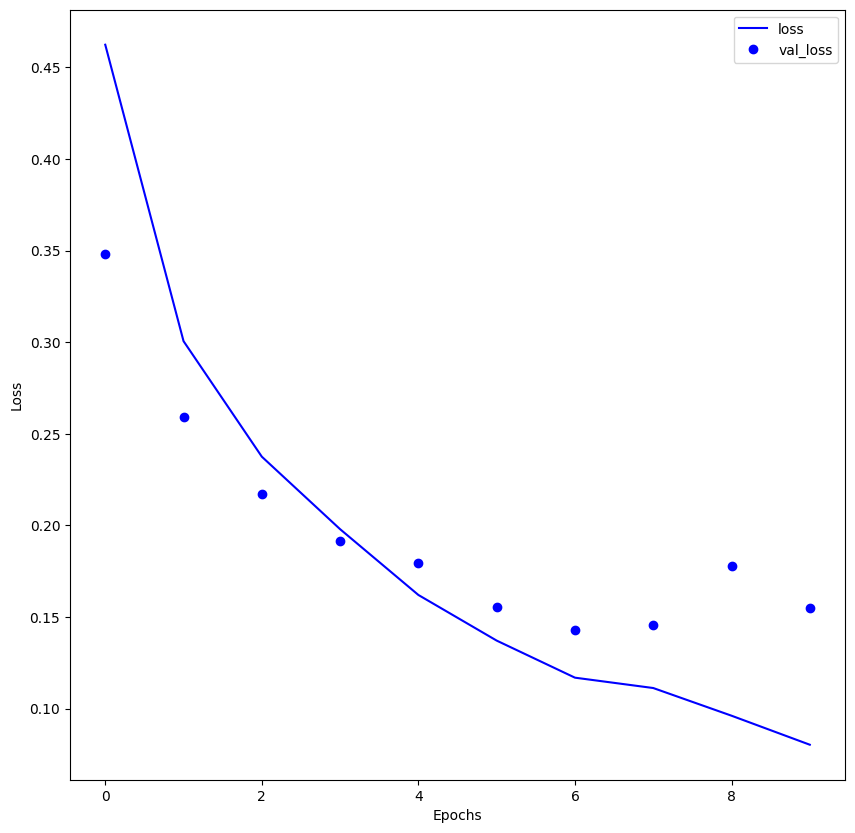

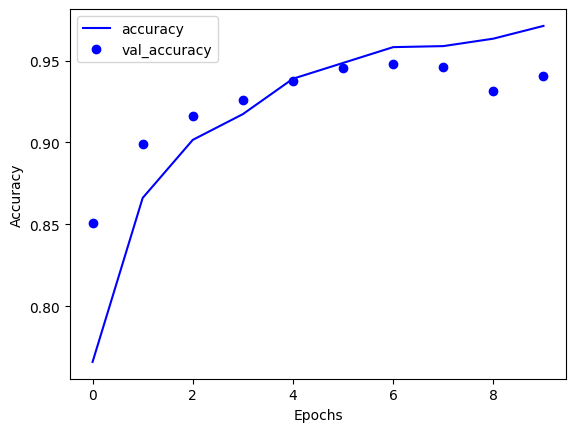

Epoch 4


<Figure size 640x480 with 0 Axes>

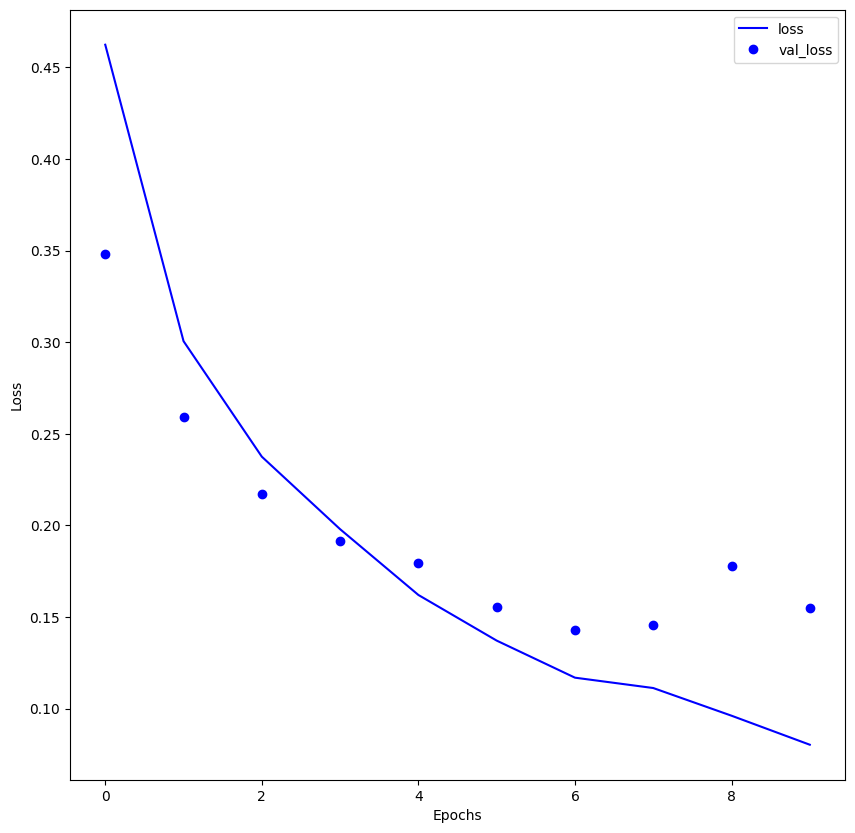

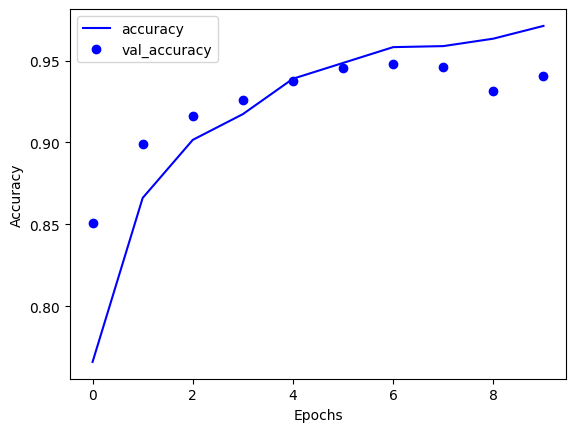

Epoch 5


<Figure size 640x480 with 0 Axes>

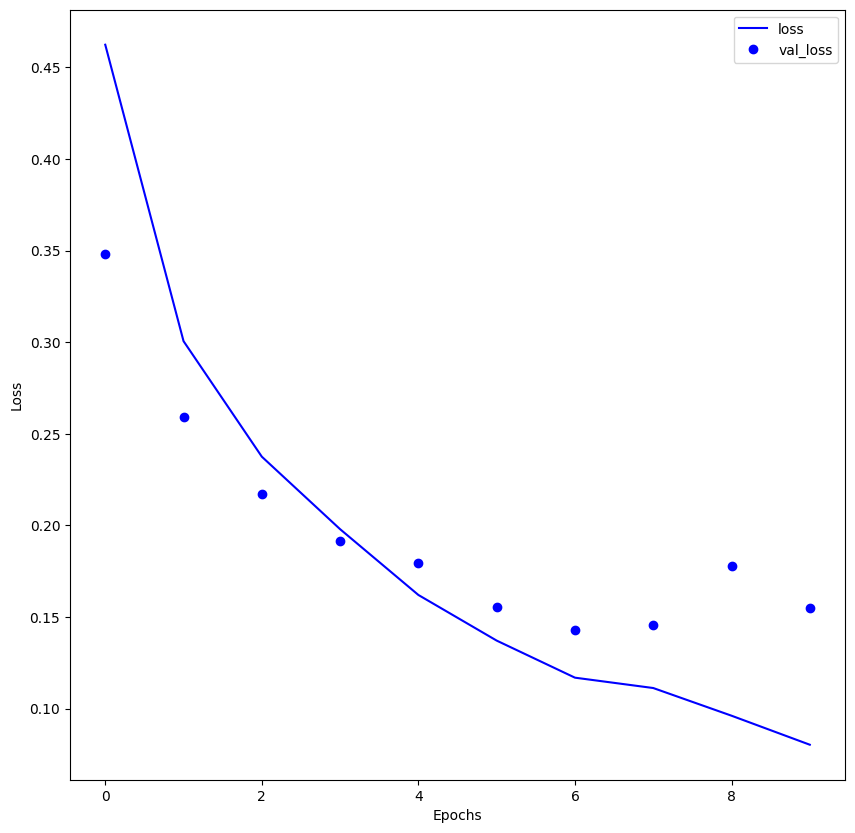

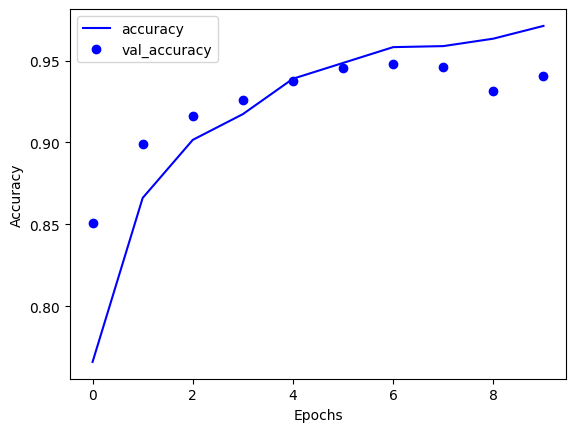

Epoch 6


<Figure size 640x480 with 0 Axes>

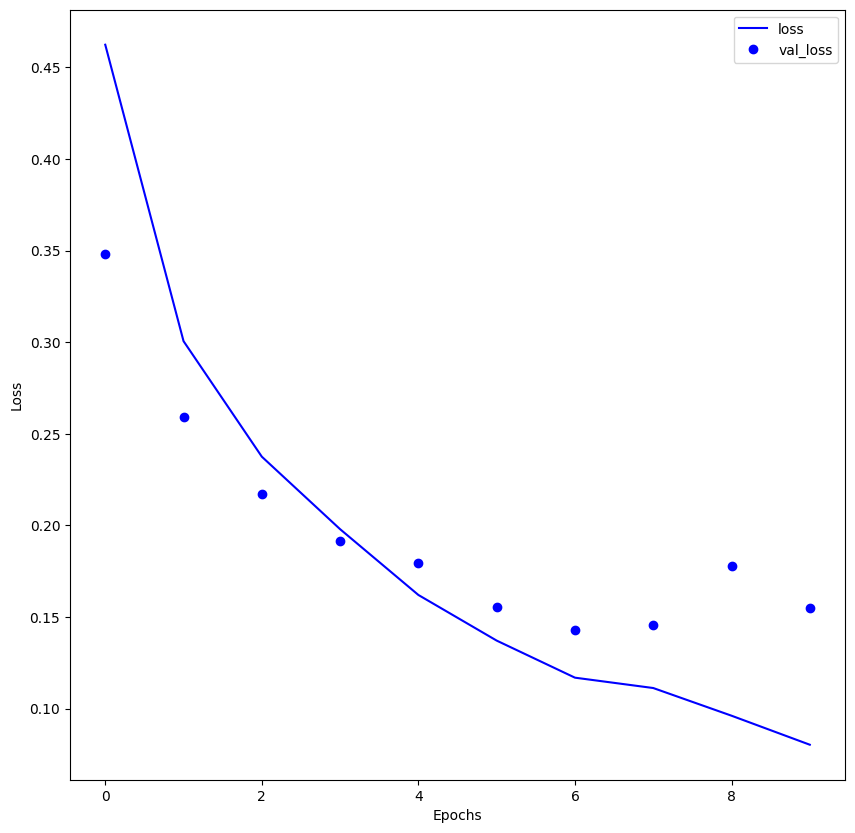

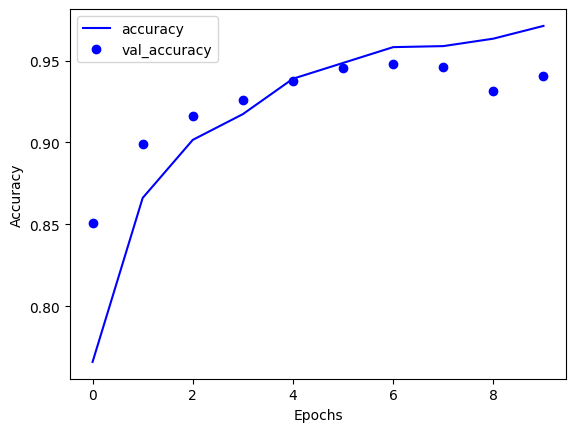

Epoch 7


<Figure size 640x480 with 0 Axes>

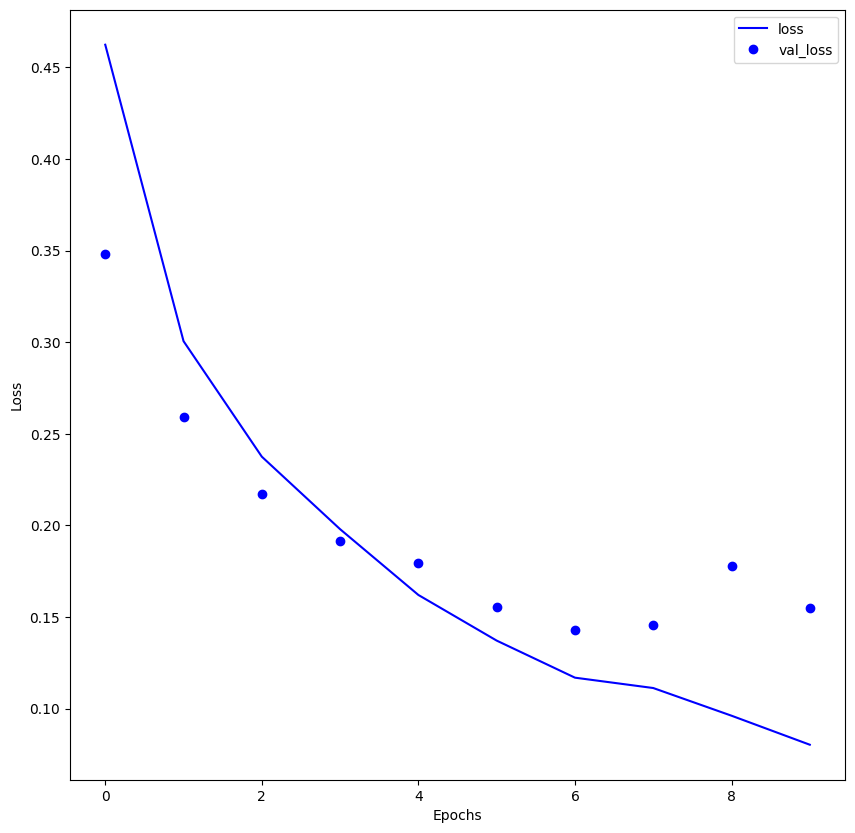

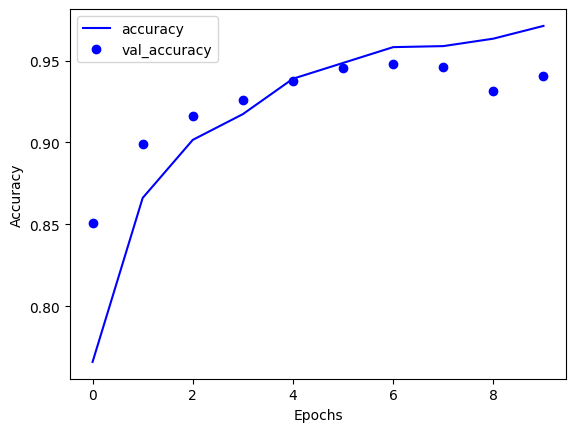

Epoch 8


<Figure size 640x480 with 0 Axes>

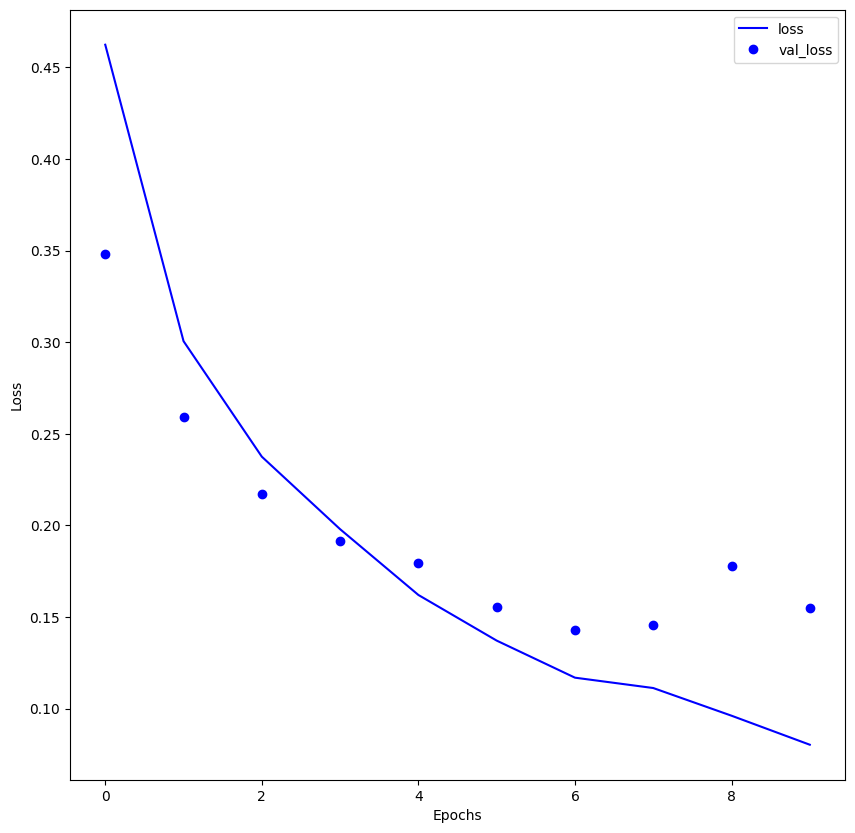

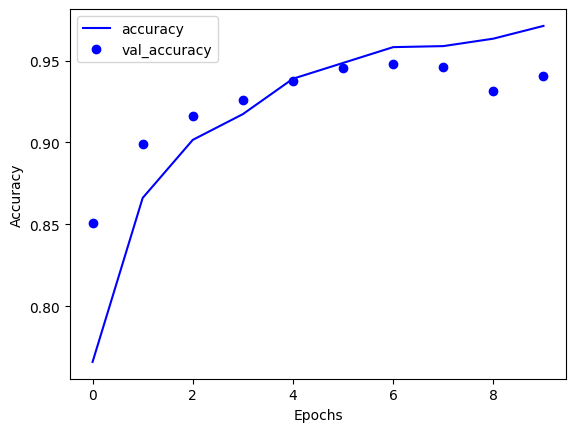

Epoch 9


<Figure size 640x480 with 0 Axes>

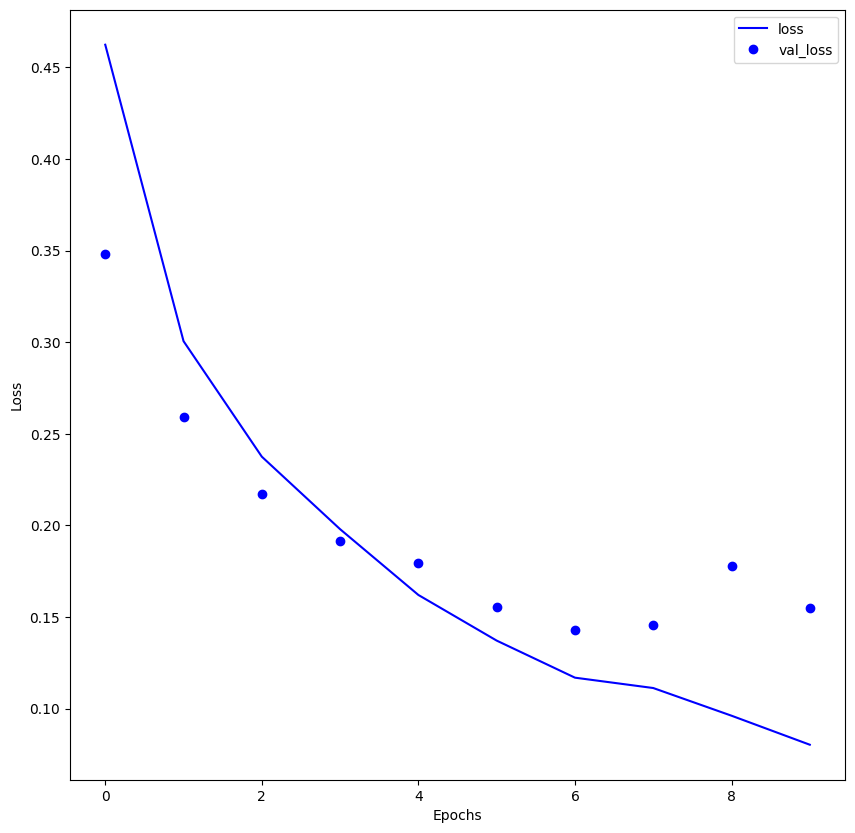

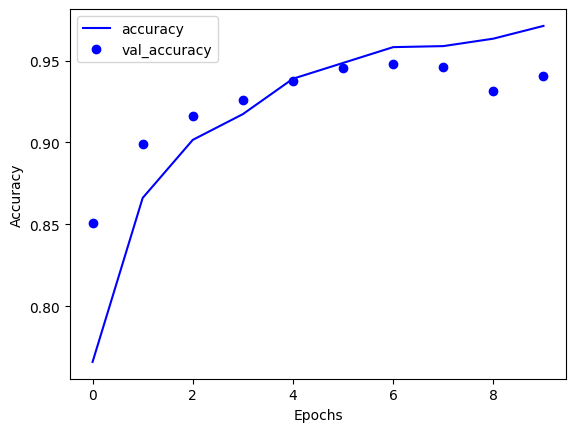

Epoch 10


<Figure size 640x480 with 0 Axes>

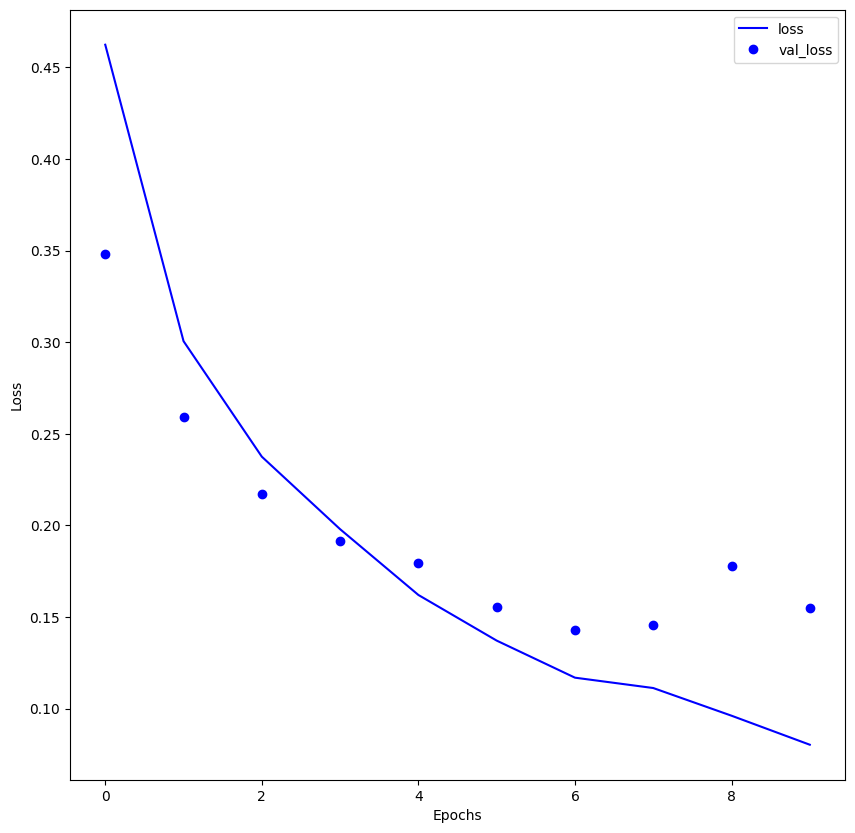

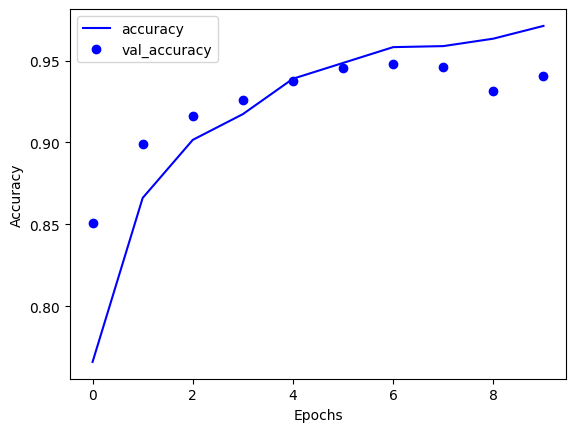

<Figure size 640x480 with 0 Axes>

In [10]:
### ploting the learning curves

def plot_learning_curves():
  for epoch in range(len(history.history['loss'])):
    print(f"Epoch {epoch + 1}")
    plt.figure(figsize = (10, 10))
    plt.plot(history.history['loss'], 'b', label = 'loss')
    plt.plot(history.history['val_loss'], 'bo', label = 'val_loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plt.plot(history.history['accuracy'], 'b', label = 'accuracy')
    plt.plot(history.history['val_accuracy'], 'bo', label = 'val_accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    plt.tight_layout()
plot_learning_curves()

In [11]:
### evaluate the model
test_loss, test_acc = model.evaluate(Xtest, ytest)
print(f"Test accuracy: {test_acc}")
print(f"Test loss: {test_loss}")

88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.9428 - loss: 0.1441
Test accuracy: 0.9407142996788025
Test loss: 0.1549285650253296


In [12]:
## predictions
predictions = np.round(model.predict(Xtest))
predictions

88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step


array([[0.],
       [0.],
       [1.],
       ...,
       [1.],
       [1.],
       [0.]], dtype=float32)

In [13]:
### prediction sur la base de test
#### bien avant mettons en place un fonction qui pretraite les données et le passe au modèle

def prediction_images(model, path):

  predictions = []
  for filename in os.listdir(path):
    if filename.endswith(('.jpg', '.jpeg', '.png')):
      image_path = os.path.join(path, filename)
      try:
        image = PIL.Image.open(image_path)
        image = image.resize((64, 64))
        image = np.array(image)
        image = image.astype('float32')/255
        image = np.expand_dims(image, axis=0)

        prediction = model.predict(image)
        predict_classes = np.argmax(prediction, axis = 1)
        predictions.append((filename, predict_classes[0]))

      except Exception as e:
        print(f"Error processing {image_path}: {e}")
  return predictions

In [ ]:
test_path = '/content/drive/MyDrive/data/test/'
predictions = prediction_images(model, test_path)

soumission = pd.DataFrame(predictions, columns = ['id', 'label'])
soumission.to_csv('submission.csv', index = False)

Streaming output truncated to the last 5000 lines.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step